## Unsupervised Learning Algorithms

### Clustering Analysis
- #### Kmeans Clustering Algorithm
- #### Agglomerative Hierrarchial Clustering

### Hierrarchial Clustering

- A.k.a Agglomerative clustering, does not require the user to specify the number of clusters. 
- Initially, each point is considered as a separate cluster, then it recursively clusters the points together depending upon the distance between them. 
- The points are clustered in such a way that the distance between points within a cluster is minimum and distance between the cluster is maximum. 
- Commonly used distance measures are Euclidean distance, Manhattan distance or Mahalanobis distance. Unlike k-means clustering, it is "bottom-up" approach.



Reading Reference for Clustering Algorithms -
https://scikit-learn.org/stable/modules/clustering.html#clustering

### Step1: Load Libraries

In [1]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering

### Step2: Load Data

In [5]:
df_raw = pd.read_csv("./data/world-happiness-report/2015.csv")
df_raw.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Step3: Explore Data

In [6]:
df_raw.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


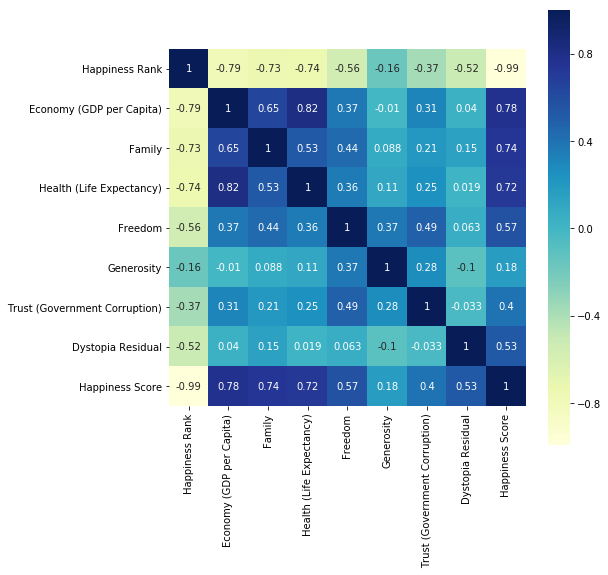

In [8]:
# Plot Correlation Heatmap to analyse correlation between continuous variables
df = df_raw[['Happiness Rank','Economy (GDP per Capita)','Family','Health (Life Expectancy)', 'Freedom', 
          'Generosity','Trust (Government Corruption)','Dystopia Residual','Happiness Score']] #Subsetting the data
cor = df.corr() #Calculate the correlation of the above variables

fig,ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
sns.heatmap(cor, square = True,annot=True,cmap="YlGnBu") #Plot the correlation as heat map

### Step4: Agglomorative Approach to identify clusters

- Starts with one cluster and adds items or data points closer to it in iterative manner till all the points are added to one single large cluster.
- Its a bottom up approach where clustering starts with individual points and stops at one large cluster that includes all the points.

### Main Approaches to merge data points:
- Single Link: distance between closest members of a cluster. **Most Comonly Used**
- Complete Linkage: distance between members which aqre farthest apart
- Average Linage: looking at distance between each pair and averages all those distances

In [9]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

In [10]:
clust_labels1 = doAgglomerative(df, 2)
agglomerative = pd.DataFrame(clust_labels1)
df.insert((df.shape[1]),'agglomerative',agglomerative)

In [11]:
# Just to check if kmeans column added to the dataframe
df.tail()

,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Happiness Score,agglomerative
153,154,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191,0.67042,3.465,1
154,155,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,1.63328,3.340,1
155,156,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906,0.32858,3.006,1
156,157,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062,1.83302,2.905,1
157,158,0.20868,0.13995,0.28443,0.36453,0.16681,0.10731,1.56726,2.839,1


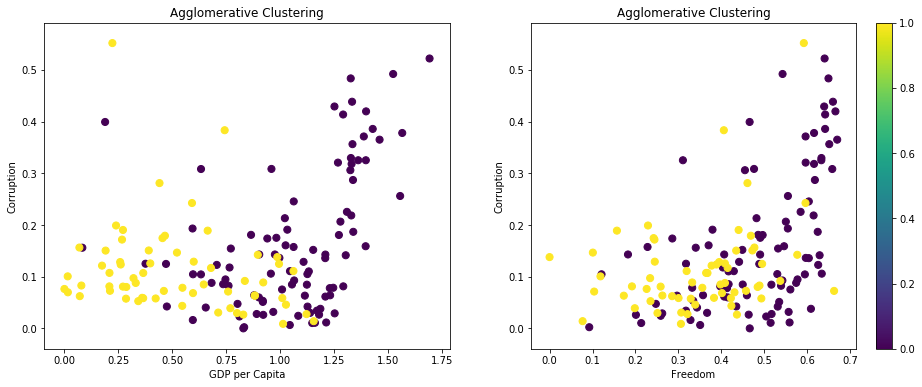

In [14]:
# Plot scatter plot
fig, (ax0,ax1) = plt.subplots(ncols= 2)
fig.set_figwidth(16)
fig.set_figheight(6)

# Scatter plots of Corruption vs GDP
scatter = ax0.scatter(df['Economy (GDP per Capita)'],df['Trust (Government Corruption)'],
                     c=agglomerative[0],s=50)
ax0.set_title('Agglomerative Clustering')
ax0.set_xlabel('GDP per Capita')
ax0.set_ylabel('Corruption')

# Scatter plots of Corruption vs GDP

scatter = ax1.scatter(df['Freedom'],df['Trust (Government Corruption)'],
                     c=agglomerative[0],s=50)
ax1.set_title('Agglomerative Clustering')
ax1.set_xlabel('Freedom')
ax1.set_ylabel('Corruption')

plt.colorbar(scatter)

In [15]:
# Convert Cluster to
df["cluster_name"] = df["agglomerative"].apply(lambda x: "cluster0" if x == 0 else "cluster1")

/Users/paragpradhan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
df.tail()

,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Happiness Score,agglomerative,cluster_name
153,154,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191,0.67042,3.465,1,cluster1
154,155,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,1.63328,3.340,1,cluster1
155,156,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906,0.32858,3.006,1,cluster1
156,157,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062,1.83302,2.905,1,cluster1
157,158,0.20868,0.13995,0.28443,0.36453,0.16681,0.10731,1.56726,2.839,1,cluster1


/Users/paragpradhan/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


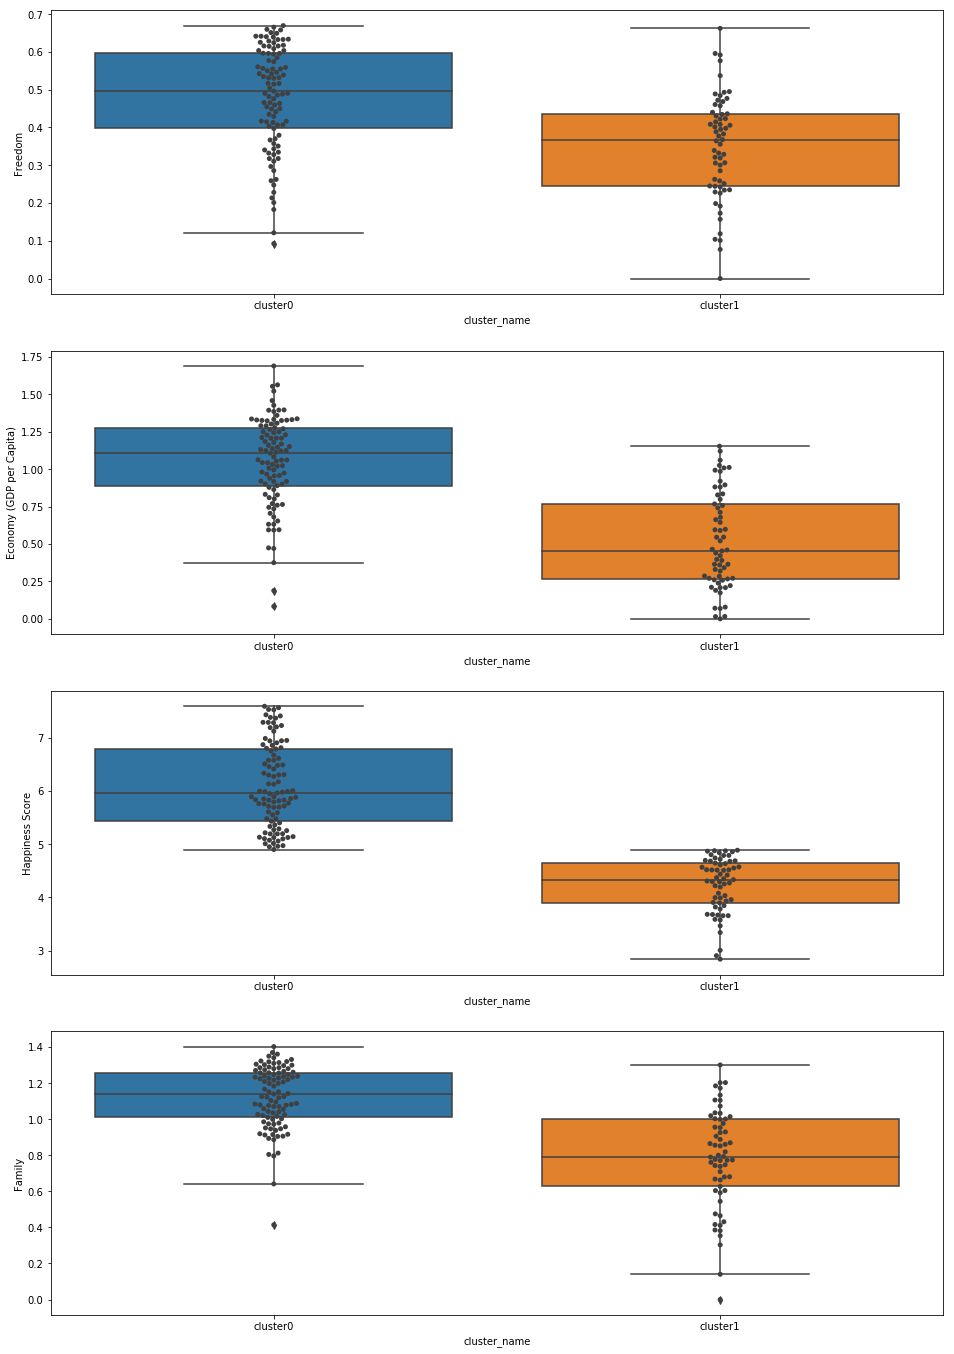

In [17]:
fig, (ax,ax2,ax3,ax4) = plt.subplots(nrows = 4)
fig.set_figwidth(16)
fig.set_figheight(24)
x = sns.boxplot(x="cluster_name", y='Freedom', data=df, ax= ax)
x = sns.swarmplot(x="cluster_name", y='Freedom', data=df,color=".25",ax= ax)
# Cluster analysis of employment
x = sns.boxplot(x="cluster_name", y='Economy (GDP per Capita)', data=df, ax= ax2)
x = sns.swarmplot(x="cluster_name", y='Economy (GDP per Capita)', data=df,color=".25",ax= ax2)
# Cluster analysis of employment
x = sns.boxplot(x="cluster_name", y='Happiness Score', data=df, ax= ax3)
x = sns.swarmplot(x="cluster_name", y='Happiness Score', data=df,color=".25",ax= ax3)
# Cluster analysis of employment
x = sns.boxplot(x="cluster_name", y='Family', data=df, ax= ax4)
x = sns.swarmplot(x="cluster_name", y='Family', data=df,color=".25",ax= ax4)

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
df = df.set_index('cluster_name')
del df.index.name

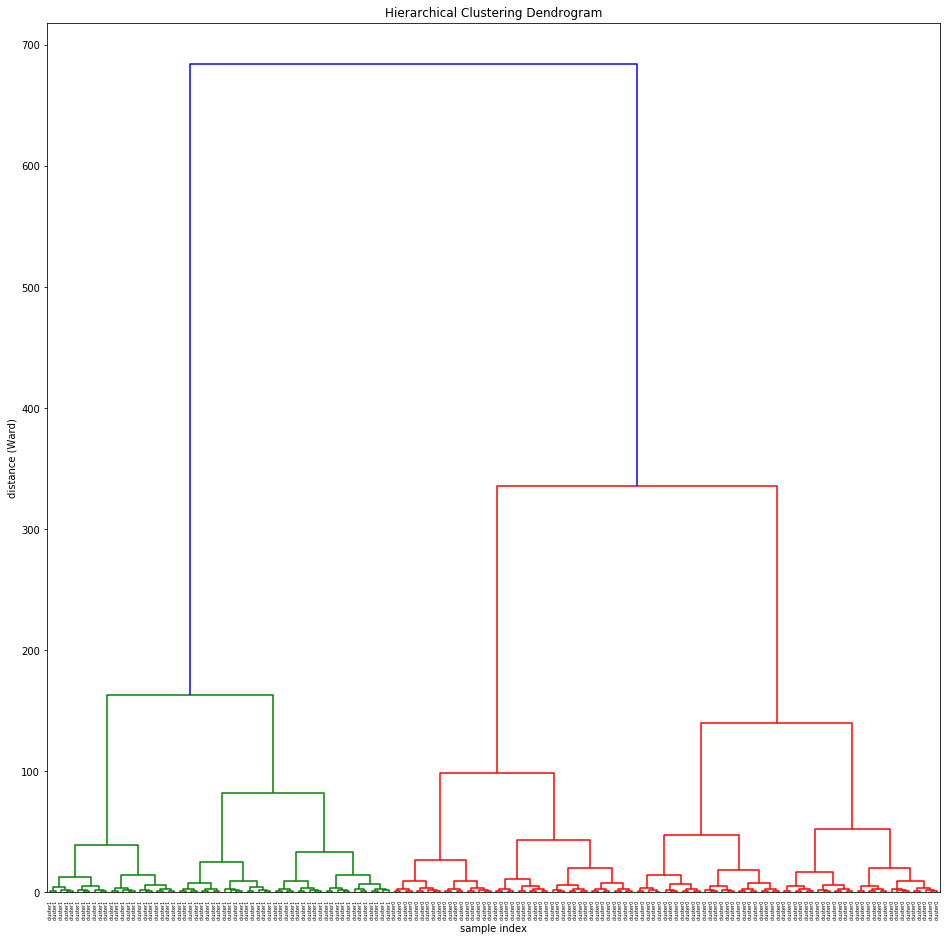

In [20]:
# Calculate the distance between each sample
Z = linkage(df, 'ward')
 
# Make the dendro
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(16)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
dn = dendrogram(Z, labels=df.index, leaf_rotation=90)